In [53]:
from methods.unet import UNet_encoder
import torch
from utils_loader import test_idea_dataloader_e2
config = {
    'batch_size': 128,
    'epochs':200,
    'fsl': False,
    'model': 'unet',
    'seed': 73054772,
    'dataset': 'physiq'
}
train_loader, val_loader, test_loader = test_idea_dataloader_e2(config)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = UNet_encoder(in_channels=6, out_channels=2, cnn_embed_dims=[64]).float().to(device)
model.load_state_dict(torch.load('saved_model/opportunity_unet_test_EXP2_B.pth', map_location=device))
model

UNet_encoder(
  (final_conv): Linear(in_features=64, out_features=2, bias=True)
  (backbone): Sequential(
    (0): ConvBlock(
      (conv1): Conv1d(6, 64, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
      (relu): ReLU(inplace=True)
    )
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)

torch.Size([10, 50, 6]) torch.Size([10, 1])
torch.Size([10, 1, 50])


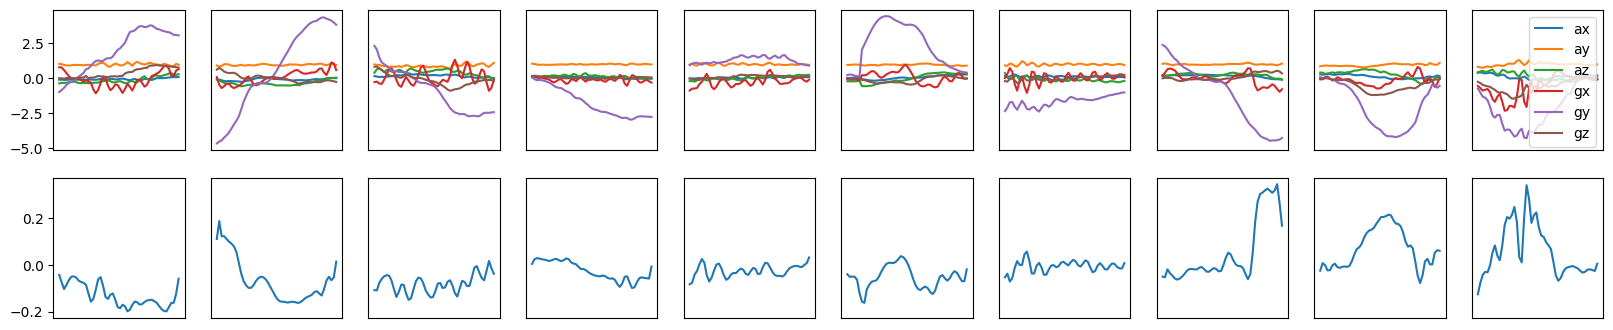

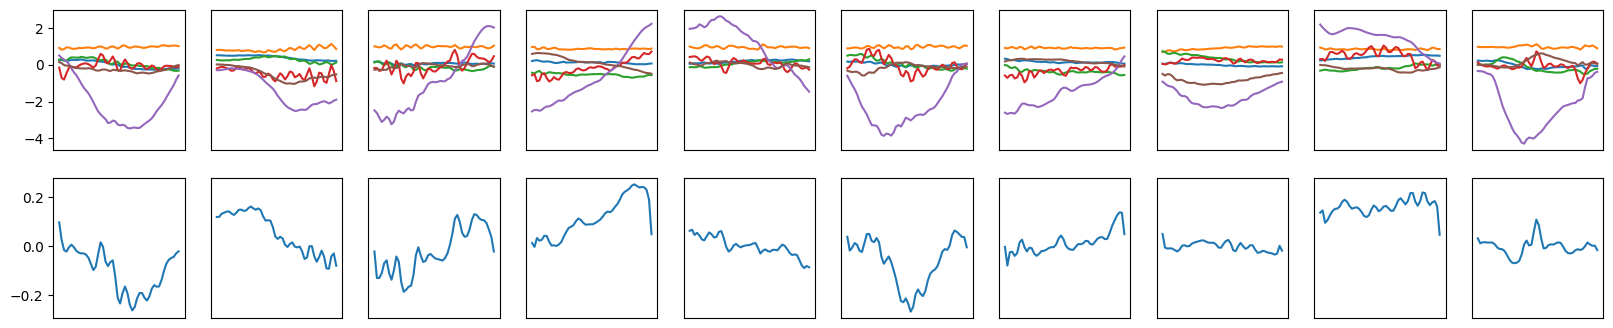

In [77]:
from captum.attr import LayerGradCam, LayerAttribution
from matplotlib import pyplot as plt
# print(model.backbone[-2].conv2)
layer_gc = LayerGradCam(model, model.backbone[-2].conv2)
# get one sample from 0 and 1 label:
inputs, labels = next(iter(test_loader))
input_0 = inputs[torch.where(labels == 0)[0]][0:10].float()
input_1 = inputs[torch.where(labels == 1)[0]][0:10].float()
label_0 = labels[torch.where(labels == 0)[0]][0:10].float().unsqueeze(1)
label_1 = labels[torch.where(labels == 1)[0]][0:10].float()
print(input_0.shape,label_0.shape)
attr_0 = layer_gc.attribute(input_0, target=0)
print(attr_0.shape)
# upsampled_attr = LayerAttribution.interpolate(attr, (6, 50))
# print(upsampled_attr.shape)
# use attr as color with cmap to visualize input:
fig, ax = plt.subplots(2, 10, figsize=(20, 4),sharex=True, sharey='row')
for i in range(10):
    for j in range(6):
        lb = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
        ax[0, i].plot(input_0[i,:, j].detach().numpy(), label=lb[j])
    ax[1, i].plot(attr_0[i, 0].detach().numpy())
    if i != 0:
        ax[0, i].yaxis.set_visible(False)
        ax[1, i].yaxis.set_visible(False)
    ax[0, i].xaxis.set_visible(False)
    ax[1, i].xaxis.set_visible(False)

ax[0, i].legend()
plt.show()
    
attr_1 = layer_gc.attribute(input_1, target=1)
fig, ax = plt.subplots(2, 10,  figsize=(20, 4),sharex=True, sharey='row')
for i in range(10):
    for j in range(6):
        lb = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
        ax[0, i].plot(input_1[i,:, j].detach().numpy(), label=lb[j])
    ax[1, i].plot(attr_1[i, 0].detach().numpy())
    if i != 0:
        ax[0, i].yaxis.set_visible(False)
        ax[1, i].yaxis.set_visible(False)
    ax[0, i].xaxis.set_visible(False)
    ax[1, i].xaxis.set_visible(False)

# ax[0].plot(input_0[0].detach().numpy())
# ax[1].plot(attr_0[0, 0].detach().numpy())
# plt.show()

# attr_1 = layer_gc.attribute(input_1, target=None)
# fig, ax = plt.subplots(2, 10)
# ax[0].plot(input_1[0].detach().numpy())
# ax[1].plot(attr_1[0, 0].detach().numpy())
# plt.show()